# Examen parcial 2 (raizes y ~interpolacion)
* Antes de enviar el archivo, $\textbf{reiniciar y ejecutar el kernel}$ para ver que el archivo se compila sin errores
* enviar el archivo jupyter sin anexos antes de las 10.10am del 04.03.2022 a mi dirección de correo electrónico: michal.hemmerling@udea.edu.co 

# Ejercicio

Bajo ciertas condiciones, los dispositivos ópticos como los láseres pueden mostrar un comportamiento complejo en el perfil del rayo de luz.


<table><tr>
<td> <img src="nonlinear_behaviour.png" width="600" /> </td>
</tr></table>
 
Para un dispositivo óptico particular que consiste en un medio no lineal dentro de una cavidad óptica, esto sólo ocurre cuando la intensidad I se encuentra dentro de un cierto rango que está dado por la ecuación: 

$$f(x)=(x+1)^2 - c(x-1) < 0 $$

donde $x$ es la intensidad del campo eléctrico y $c$ es la fuerza de la absorción del 
medio no lineal. 

## 1. 
Cree una función llamada `f_cost` que reciba dos parámetros (x,c) y solo devuelva la función f(x) como se mencionó anteriormente.

In [1]:
# tu codigo:
import numpy as np
import matplotlib.pyplot as plt

def f_cost(x,c):
    return (x+1)**2 - c*(x-1)


## 2. 
Usando funcion `f_cost` haz un gráfico con cuatro curvas para c=5,10,15,20 y con x entre -10,20 (50 puntos)
* hacer que cada curva sea de un color diferente
* añadir etiquetas

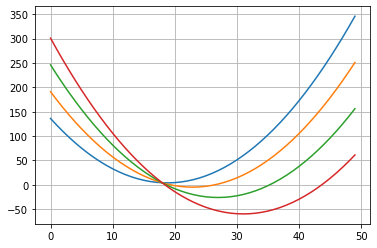

In [2]:
# tu codigo:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10,20,50)
c = [5,10,15,20]


plt.plot(f_cost(x,c[0]))
plt.plot(f_cost(x,c[1]))
plt.plot(f_cost(x,c[2]))
plt.plot(f_cost(x,c[3]))

plt.grid(True)
plt.show()


## 2a. Para cual `c` esta funcion no tiene raices?


Como se ve en la gráfica, solo la funcion 1, con c = 5 no tiene raices, ya que nunca se cruza con el eje horizontal. 


## 3. 
Cree una función llamada `root_finding()` que devuelva el valor de la raíz (si existiera) para cada parametro `c` (pense `Newton` o `bisecion`). Usando esta funcion vamos a buscar primero raiz izquierda y despues raiz derecha.

In [3]:
# tu codigo:
def f_5(x):
    return f_cost(x,5)
def f_10(x):
    return f_cost(x,10)
def f_15(x):
    return f_cost(x,15)
def f_20(x):
    return f_cost(x,20)

def root_finding( f, a, b, Nmax, printer=False ):
    #Verificando si a y b corresponden a un intervalo apropiado
    if f(a)*f(b)>0:
        print("Puntos iniciales incorrectos para", f,f(a)*f(b))
        return False
    #Se asignan los valores a los extremos
    ai = a
    bi = b
    #Iteraciones
    n = 1
    while n<=Nmax:
        #Bisección
        pi = (ai+bi)/2.0
        #Evaluando la funcion en pi
        if printer:
            print ("Valor de %d iteración:"%(n),pi)
        #Condicion A
        if f(pi)*f(ai)>0:
            ai = pi
        #Condicion B
        elif f(pi)*f(ai)<0:
            bi = pi
        #Condicion C: repetir el bucle
        n+=1
    #Resultado
    return pi

result1 = root_finding(f_5, 2, 50, 100, False)
result2 = root_finding(f_10, 2, 50, 100, False)
result3 = root_finding(f_15, 2, 50, 100, False)
result4 = root_finding(f_20, 2, 50, 100, False)
print(result1,result2,result3,result4)
#print("Error absoluto", abs((2**(1/3.0)-result)))



Puntos iniciales incorrectos para <function f_5 at 0x000001E9FEA343A0> 9424
False 6.23606797749979 11.6234753829798 16.745966692414836


Con el objetivo de simplificar el código y hacelerar el proceso, se usará un método simplificado.

In [4]:
import scipy.optimize as optimize
def root_finding2(f_cost, start,c):
    try:
        root = optimize.newton(f_cost,start,args=(c,))
    except:
        root=np.nan
    return root


## 4a. 
Primero vamos a mirar el comportamiento de raiz de lado izquierda: Defina el vector `c_vec` que contiene 50 valores de 5 a 100. En el loop, llame a la función `root_finding()` para cada valor `c` en el vector `c_vec`. Guarda los resultados en variable `left_roots`

In [5]:
# tu codigo:

c_vec = np.linspace(5,100,50)
leftroots = []
start = 2
for c in c_vec:
    try:
        raiz = root_finding2(f_cost,start,c)
    except:
        raiz = np.nan
        
    leftroots.append(raiz)

## 4b 
Hacer un gráfico de raíz izquierda vs c

Text(0, 0.5, 'raiz')

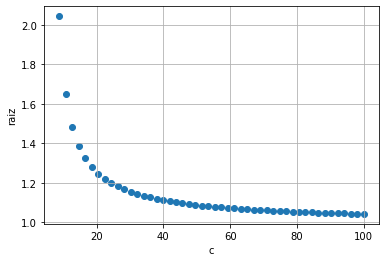

In [6]:
# tu codigo:

fig, ax =plt.subplots(1,1)
ax.scatter(c_vec,leftroots)
ax.grid('True')
ax.set_xlabel('c')
ax.set_ylabel('raiz')



## 5a. 
Ahora vamos a mirar el comportamiento de raiz de lado derecha: Defina el vector `c_vec` que contiene 50 valores de 5 a 100. En el loop, llame a la función `root_finding()` para cada valor `c` en el vector `c_vec`. Guarda los resultados en variable `right_roots`.

In [7]:

c_vec = np.linspace(5,100,50)
leftroots = []
start = 50
for c in c_vec:
    try:
        raiz = root_finding2(f_cost,start,c)
    except:
        raiz = np.nan
        
    leftroots.append(raiz)

## 5b
* Hacer un gráfico de raíz derecha vs c

Text(0, 0.5, 'raiz')

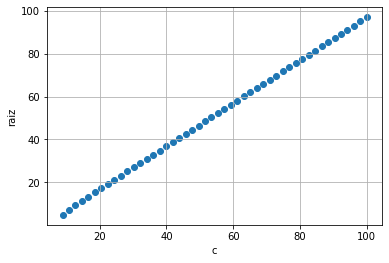

In [8]:
fig, ax =plt.subplots(1,1)
ax.scatter(c_vec,leftroots)
ax.grid('True')
ax.set_xlabel('c')
ax.set_ylabel('raiz')


## 6. 
Pregunta:
* este cierto *rango* para cual se obtiene un comportamiento complejo esta convergente o divergente cuando `c` es creciente
* si este rango esta convergiendo, ¿a qué valor?
* si este rango esta divergente, como esta divergente (lineal, cuadrático, diferente)

### Respuesta:
Note que para la raiz derecha esta converge a 1 para valores mayores de c, mientras que la izquierda no deja de crecer linealmente.


# Feedback:

`Correct implementation of the f_cost function + labeled plot 	  (max 2.0p):	2.0p`
`Correct implementation of the root finding function 		       (max 2.0p):	2.0p`
`Correct result of the evolution of the left roots (+ plot)	     (max 2.0p):	2.0p`
`Correct result of the evolution of the right roots (+ plot)	    (max 2.0p):	2.0p`
`Correct conclusion of the range behavious			              (max 2.0p):	2.0p`

`- Total:                                                          (max 10.0p):   10.0p`
`